<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/SimpleNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [ ]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])

In [ ]:
def ReLU(H):
  return H*(H>0)

def softmax(H):
  eH= np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

def cross_entropy(Y,P_hat):
  return -np.sum(Y*np.log(P_hat))

def one_hot_encode(y):
  N= len(y)
  K= len(set(y))

  Y=np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]= 1
  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
{str(i): j for i,j in zip(range(4),range(10,14))}

{'0': 10, '1': 11, '2': 12, '3': 13}

In [ ]:
class ANN():

  def fit(self, X, y, neurons=10, eta=1e-3, epochs= 1e3, show_curve=False):
    epochs= int(epochs)
    Y= one_hot_encode(y)

    N,D= X.shape
    K=Y.shape[1]

    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip([D, neurons], [neurons, K]),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}

    self.a= {1: np.tanh, 2: softmax}
    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.forward(X)

      P_hat= self.Z[2]

      

      J[epoch] = cross_entropy(Y, P_hat)

      self.W[2] -= eta*(1/N)*self.Z[1].T@(P_hat - Y)
      self.b[2] -= eta*(1/N)*(P_hat - Y).sum(axis=0)

      self.W[1] -= eta*(1/N)*X.T@((P_hat-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.b[1] -= eta*(1/N)*((P_hat- Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.show()

  def forward(self, X):

    self.Z = {0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.b[l])

  def predict(self, X):
    self.forward(X)
    return self.Z[2].argmax(axis=1)





In [ ]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)
    
    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))
    
    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
    
    ann = ANN()
    ann.fit(X, y, neurons = 20, eta = 4e-2, epochs = 2e3, show_curve = True)
    y_hat = ann.predict(X)
    
    print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")
    
    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
    
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = ann.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

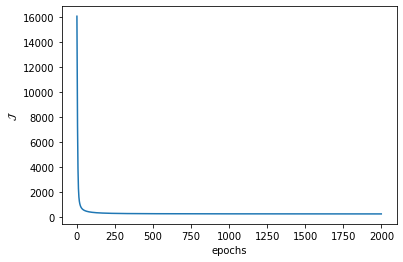

Training Accuracy: 0.9737


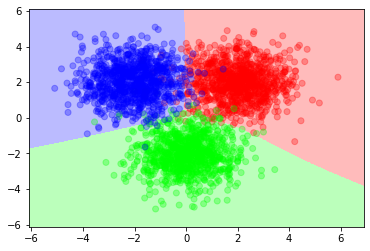

In [ ]:
if __name__ == "__main__":
  main()

In [ ]:
###########################################   Use TripGaussKNN data  ###############################################

data = pd.read_csv('/content/drive/MyDrive/TripGaussKNN.csv')

In [ ]:
y_data = data['2'].to_numpy()

In [ ]:
X_data = data[['0','1']].to_numpy()

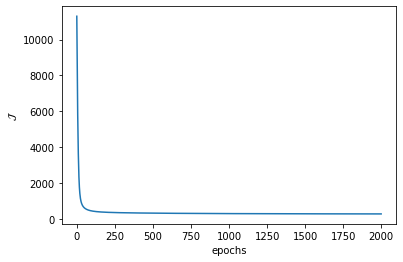

In [ ]:
 ann2 = ANN()
 ann2.fit(X_data, y_data, neurons = 20, eta = 4e-2, epochs = 2e3, show_curve = True)


In [ ]:
 y_hat1 = ann2.predict(X_data)

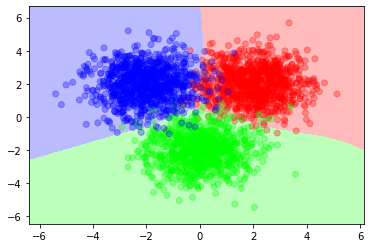

In [ ]:
##################################  Plot Data w/ Original y  #################################
x1 = np.linspace(X_data[:,0].min() - 1, X_data[:,0].max() + 1, 1000)
x2 = np.linspace(X_data[:,1].min() - 1, X_data[:,1].max() + 1, 1000)
    
xx1, xx2 = np.meshgrid(x1, x2)
Z = ann2.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
plt.figure()
plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
plt.scatter(X_data[:,0], X_data[:,1], c = y_data, cmap = cmap_bold,alpha=.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.show()

In [ ]:
############################ Accuracy between actual and prediction  #################################
accuracy(y_data, y_hat1)

0.969

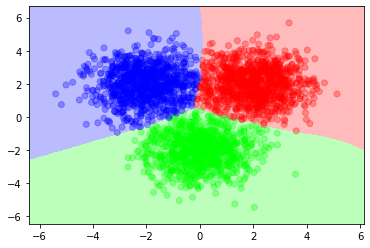

In [ ]:
#####################################  Plot data w/ y_hat1 #####################################
x1 = np.linspace(X_data[:,0].min() - 1, X_data[:,0].max() + 1, 1000)
x2 = np.linspace(X_data[:,1].min() - 1, X_data[:,1].max() + 1, 1000)
    
xx1, xx2 = np.meshgrid(x1, x2)
Z = ann2.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
plt.figure()
plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
plt.scatter(X_data[:,0], X_data[:,1], c = y_hat1, cmap = cmap_bold,alpha=.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.show()x1 = np.linspace(X_data[:,0].min() - 1, X_data[:,0].max() + 1, 1000)
x2 = np.linspace(X_data[:,1].min() - 1, X_data[:,1].max() + 1, 1000)
    
xx1, xx2 = np.meshgrid(x1, x2)
Z = ann2.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
plt.figure()
plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
plt.scatter(X_data[:,0], X_data[:,1], c = y_data, cmap = cmap_bold,alpha=.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.show()

In [ ]:
y_hat1

array([0, 0, 0, ..., 2, 2, 2])